# Body Shapes
This script reads in a CSV file and calculates the shape of an individual based on their bust, waist and hip measurements. It add their body shape to a new column in the CSV file.

In [1]:
# Dependencies
import pandas as pd
from shapes_calculator import calculate_shape
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Testing that imported function works
print(calculate_shape(34, 26, 36))

triangle


### Import and Clean Data

In [3]:
# Store CSV file as DataFrame
df = pd.read_csv('Data/style_blogger_index.csv')
del df['Email Address']
df.head()

,Timestamp,Blog/Instagram Account Name,Blog/Instagram Account Link(s),Dress size (US),Shoe size (US),Age Range,Height (feet/inches),Bust (inches),Waist (inches),Hip (inches),Describe your style:,"Are you interested in buying, selling, or swapping clothes?",Location,Profession,Race/Ethnicity,Comments,Waist:Hip Ratio,Height in inches
0,11/25/2020 13:58,ilsaengel,https://www.instagram.com/ilsaengel/,12,7,30-34,5'1,43.0,32.0,43.0,"artsy, maximalist, vintage",Yes,"Austin, TX","Academia/Research, Arts/Architecture/Design, S...","White, Jewish",NaN,NaN,NaN
1,11/25/2020 11:32,AJ Wears Clothes,https://instagram.com/ajwearsclothes,"6, 8",7.5,35-39,5'2,36.0,29.0,40.0,"business-casual, comfy, feminine, trendy",Yes,"Little Rock, AR, USA",Marketing/Sales,White,NaN,NaN,NaN
2,11/25/2020 0:36,Electric Bones,https://instagram.com/electric.bones,0,6.5,25-29,5'7,34.0,24.0,32.0,"dark, eclectic, thrifted",Yes,"Phoenix, AZ, USA",Marketing/Sales,White,NaN,0.75,NaN
3,11/25/2020 0:29,Katherine Rose,https://kat-rose.com/,"00, 0",8,30-34,5'4,32.0,24.0,33.0,"casual, chic, classic, feminine, minimalist, m...",Yes,"Berkeley, CA, USA","Administrative, Other (you can specify in the ...",White,NaN,0.73,NaN
4,11/24/2020 23:44,mirrorselfiefashionblogger,https://www.instagram.com/mirrorselfiefashionb...,"8, 10",10.5N,20-24,5'10,36.0,29.0,38.0,"chic, comfy, modern, polished, practical, trendy",No,NaN,Other (you can specify in the last question),Southeast Asian,I work in media!,0.76,NaN


In [4]:
# Get overview of data to see if there are missing values - we are missing some values for bust/waist/hip
df.count()

Timestamp                                                      598
Blog/Instagram Account Name                                    598
Blog/Instagram Account Link(s)                                 598
Dress size (US)                                                597
Shoe size (US)                                                 490
Age Range                                                      597
Height (feet/inches)                                           595
Bust (inches)                                                  548
Waist (inches)                                                 543
Hip (inches)                                                   537
Describe your style:                                           591
Are you interested in buying, selling, or swapping clothes?    248
Location                                                       583
Profession                                                     587
Race/Ethnicity                                                

In [5]:
# Drop empty cells at bottom
df.dropna(subset=['Timestamp'], inplace=True)

### Calculate Body Shape

In [6]:
# Create new column to store shape in
df['Shape'] = ''

# Review measurements, determine shape and store shape in DataFrame column 'Shape'
for index, row in df.iterrows():
    try:
        shape = calculate_shape(row['Bust (inches) '], row['Waist (inches)'], row['Hip (inches)'])
        df.loc[index, 'Shape'] = shape
    except: 
        df.loc[index, 'Shape'] = None
df.head()

,Timestamp,Blog/Instagram Account Name,Blog/Instagram Account Link(s),Dress size (US),Shoe size (US),Age Range,Height (feet/inches),Bust (inches),Waist (inches),Hip (inches),Describe your style:,"Are you interested in buying, selling, or swapping clothes?",Location,Profession,Race/Ethnicity,Comments,Waist:Hip Ratio,Height in inches,Shape
0,11/25/2020 13:58,ilsaengel,https://www.instagram.com/ilsaengel/,12,7,30-34,5'1,43.0,32.0,43.0,"artsy, maximalist, vintage",Yes,"Austin, TX","Academia/Research, Arts/Architecture/Design, S...","White, Jewish",NaN,NaN,NaN,hourglass
1,11/25/2020 11:32,AJ Wears Clothes,https://instagram.com/ajwearsclothes,"6, 8",7.5,35-39,5'2,36.0,29.0,40.0,"business-casual, comfy, feminine, trendy",Yes,"Little Rock, AR, USA",Marketing/Sales,White,NaN,NaN,NaN,triangle
2,11/25/2020 0:36,Electric Bones,https://instagram.com/electric.bones,0,6.5,25-29,5'7,34.0,24.0,32.0,"dark, eclectic, thrifted",Yes,"Phoenix, AZ, USA",Marketing/Sales,White,NaN,0.75,NaN,hourglass
3,11/25/2020 0:29,Katherine Rose,https://kat-rose.com/,"00, 0",8,30-34,5'4,32.0,24.0,33.0,"casual, chic, classic, feminine, minimalist, m...",Yes,"Berkeley, CA, USA","Administrative, Other (you can specify in the ...",White,NaN,0.73,NaN,hourglass
4,11/24/2020 23:44,mirrorselfiefashionblogger,https://www.instagram.com/mirrorselfiefashionb...,"8, 10",10.5N,20-24,5'10,36.0,29.0,38.0,"chic, comfy, modern, polished, practical, trendy",No,NaN,Other (you can specify in the last question),Southeast Asian,I work in media!,0.76,NaN,triangle


In [7]:
# Store index with added shape column as csv
df.to_csv('Data/style_blogger_index_shapes.csv', index=False)

### Visualize Shape Distribution

In [8]:
# Count number of each type of shape
shape_counts = df['Shape'].value_counts()
shape_counts

triangle             359
rectangle            126
hourglass             44
inverted triangle      6
Name: Shape, dtype: int64

In [9]:
# Set colors for visuals

# Choose colors
cmap = plt.get_cmap("tab20c")

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.array([1, 5, 9, 13, 17]))) 

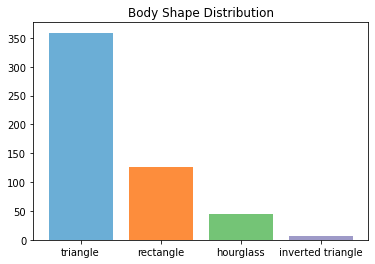

In [10]:
# Plot this information as bar graph
colors_bar = cmap(np.array([1, 5, 9, 13, 17])) 
plt.bar(shape_counts.index, shape_counts, color=colors_bar)
plt.title('Body Shape Distribution')
plt.savefig('bodyshapes.png')
plt.show()